In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [3]:
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic_df.drop(columns = ['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [68]:
pd.get_dummies(titanic_df['Sex'])

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [69]:
pd.get_dummies(titanic_df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df[['Sex','Pclass','Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [8]:
titanic_df[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [9]:
titanic_df[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


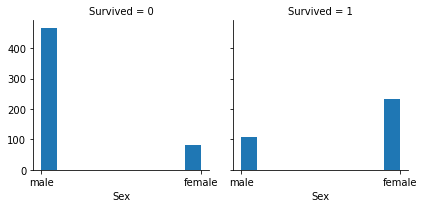

In [10]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Sex')

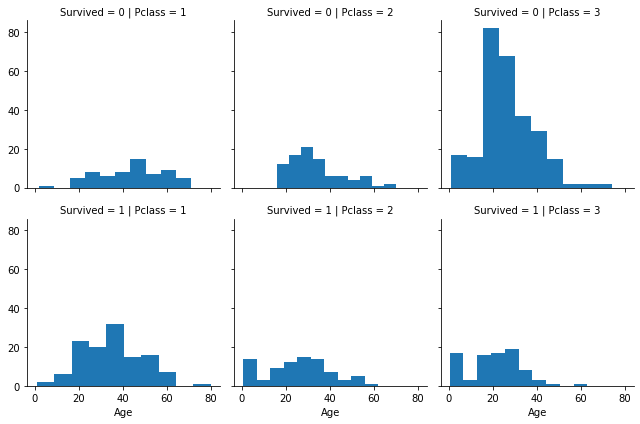

In [11]:
g = sns.FacetGrid(titanic_df, col='Pclass', row='Survived')
g.map(plt.hist, 'Age')

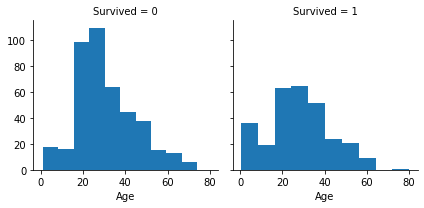

In [12]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age')

<AxesSubplot:ylabel='Frequency'>

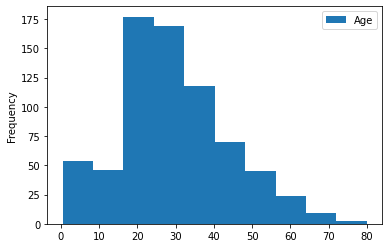

In [13]:
titanic_df.plot(x='Survived', y='Age', kind='hist')

<AxesSubplot:ylabel='Frequency'>

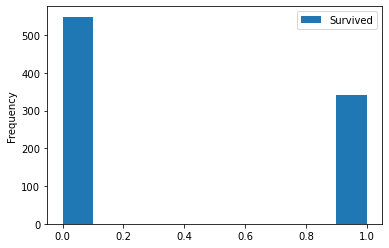

In [14]:
titanic_df.plot(x='Sex', y='Survived', kind='hist')

In [15]:
sex_convert = lambda s: 1 if s == 'female' else 0
titanic_df['Sex'] = titanic_df['Sex'].apply(sex_convert)

In [18]:
len(titanic_df.loc[titanic_df['Sex'] == 0])

577

In [19]:
len(titanic_df.loc[titanic_df['Sex'] == 1])

314

In [23]:
female_survived = len(titanic_df.loc[(titanic_df['Sex'] == 1) & (titanic_df['Survived'] == 1)])

In [24]:
female_survived

233

In [25]:
female_not_survived = len(titanic_df.loc[(titanic_df['Sex'] == 1) & (titanic_df['Survived'] == 0)])

In [26]:
female_not_survived

81

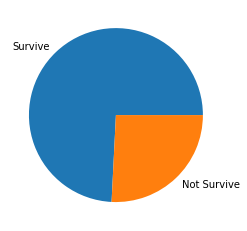

In [27]:
plt.pie([female_survived, female_not_survived], labels = ['Survive','Not Survive'])
plt.show() 

In [28]:
male_survived = len(titanic_df.loc[(titanic_df['Sex'] == 0) & (titanic_df['Survived'] == 1)])
male_not_survived = len(titanic_df.loc[(titanic_df['Sex'] == 0) & (titanic_df['Survived'] == 0)])

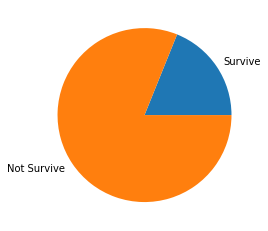

In [29]:
plt.pie([male_survived, male_not_survived], labels = ['Survive','Not Survive'])
plt.show() 

 Make a histogram of the Fare feature, colored green.


- Produce a similar plot to the pie charts above except instead of splitting the data by gender, split it by Pclass.


- Can you make any observations about these plots that visually correlate the Fare by Survived distribution?
Save that figure as a png file.

<AxesSubplot:ylabel='Frequency'>

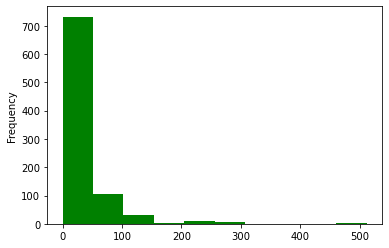

In [35]:
titanic_df['Fare'].plot(kind='hist', color = 'g')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

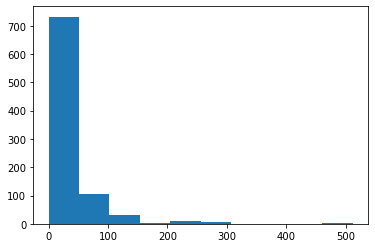

In [34]:
plt.hist(titanic_df['Fare'])

([<matplotlib.patches.Wedge at 0x7fcad1d64a60>,
 [Text(0.6465637441936395, 0.8899187180267094, 'Survived'),
  Text(-0.6465637441936395, -0.8899187180267094, 'Not Survived')])

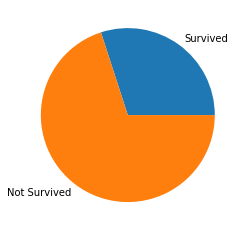

In [37]:
pClass1 = [30,70]
labels = ['Survived','Not Survived']

plt.pie(pClass1, labels = labels)

In [38]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [39]:
titanic_df['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [42]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
p1_class_survived = len(titanic_df[['Pclass','Survived']].loc[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 1)])
p1_class_not_survived = len(titanic_df[['Pclass','Survived']].loc[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 1)])

In [52]:
plt.pie([p1_class_survived, p1_class_not_survived], labels = ['Survived','Not Survived'], title = 'First Class')

TypeError: pie() got an unexpected keyword argument 'title'

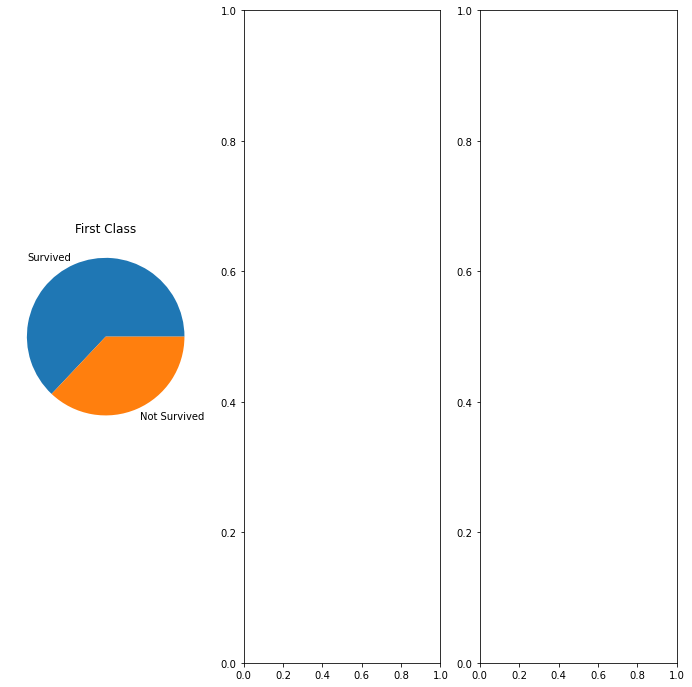

In [64]:
figure, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,12))
ax1.pie([p1_class_survived, p1_class_not_survived], labels = ['Survived','Not Survived'])
ax1.set_title('First Class')
plt.show()